# Classification Algorithms and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold


Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Setting global seed of notebook

In [2]:
np.random.seed(seed=25)

### Task 1: Load Data from 'titanic_clean.csv'

In [3]:
#write code here
data =pd.read_csv("titanic_clean.csv")
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### One Hot encoding for categorical varaibles

In [4]:
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()
df= df_OneHot.copy()

### Task 2: Create Independent and Dependent Variables

In [5]:
#write code here
X =df.drop(['Survived','PassengerId'], axis=1)
Y =df[['Survived']] 
print(X.shape)
print(Y.shape)

(891, 30)
(891, 1)


### Task 3: Train Test n Split the data

In [6]:
# Import the library
from sklearn.model_selection import train_test_split

In [7]:
#Write the code here
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623, 1)
(268, 30) (268, 1)


In [8]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
707,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
246,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
624,1,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
96,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
576,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
ytrain.head()

,Survived
707,0
246,0
624,1
96,1
576,0


In [10]:
xtest.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [11]:
ytest.head()

,Survived
760,0
773,0
266,0
507,1
524,0


# Logistic Regression

### Creating Model & Training

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr_model = LogisticRegression(random_state=25)

In [14]:
lr_model.fit(xtrain, ytrain)

C:\Users\Yasir\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=25)

### Evaluation 

In [15]:
pred = lr_model.predict(xtest)

In [16]:
pred[0:9]

array([0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

Predicting prabability of **0** and **1**

In [17]:
pred_prb = lr_model.predict_proba(xtest)

In [18]:
pred_prb[0:9,0:9]

array([[0.95461643, 0.04538357],
       [0.92889426, 0.07110574],
       [0.90085989, 0.09914011],
       [0.92889426, 0.07110574],
       [0.92889426, 0.07110574],
       [0.26584041, 0.73415959],
       [0.92889426, 0.07110574],
       [0.17363725, 0.82636275],
       [0.95461643, 0.04538357]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [19]:
lr_pred_prb = lr_model.predict_proba(xtest)[:,1]

In [20]:
#lr_pred_prba = lr_model.predict_proba(xtest)[:,0]     
# lr_pred_prba

### Comparison of Predicted and Actual

In [21]:
xtest.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [22]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.045384,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.099140,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,1
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,0


In [23]:
#xt = xtest.copy()
#xt['pred'] = pred
#xt['pred_probability'] = lr_pred_prba
#xt['actual'] = ytest
#xt.head()

### Confusion Matrix Play ground

In [24]:
from sklearn.metrics import confusion_matrix  # add confusion matrix

In [25]:
confusion_matrix(ytest, pred)    # actual values + predict vlaues

array([[150,  19],
       [ 29,  70]], dtype=int64)

In [26]:
confusion_matrix(ytest, pred).ravel()  # .revel function use karty han ya check karny ka laya ka tp,tn,fn,fp kon say ha

array([150,  19,  29,  70], dtype=int64)

In [27]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel() # label laga daya ka tp or tn wagra kon say ha 
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,70,29
Not Survived,19,150


### Accuracy

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8208955223880597


In [30]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8208955223880597


### Precision

In [31]:
from sklearn.metrics import precision_score

In [32]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7865168539325843
Precision for 0: 0.8379888268156425


In [33]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.7865168539325843


### Recall

In [34]:
from sklearn.metrics import recall_score

In [35]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7070707070707071
Recall for 0: 0.8875739644970414


In [36]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7070707070707071


### F1 Score

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.7446808510638298
F1 Score for 0: 0.8620689655172413


In [39]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.7446808510638298


### Class Distribution in Training Data

In [40]:
ytrain.value_counts()

Survived
0           380
1           243
dtype: int64

In [41]:
ytest.value_counts()

Survived
0           169
1            99
dtype: int64

### Classification Report

In [42]:
from sklearn.metrics import classification_report

In [43]:
#get report of precision recall and f1 score
print(classification_report(ytest,pred))
#macro avg 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       169
           1       0.79      0.71      0.74        99

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [44]:
import helper_confusion_matrix as helper
helper.conf_matrix(ytest,lr_pred_prb)

              pred_Survived  pred_Not Survived
Survived                 70                 29
Not Survived             19                150
Accuracy: 82.090
Precision : 78.652
Recall: 70.707
F1 Score : 74.468
TPR: 70.707  FPR: 11.243


### ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [45]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [46]:
tpr, fpr

(0.7070707070707071, 0.11242603550295859)

In [47]:
fpr = 1 - recall_0
tpr, fpr

(0.7070707070707071, 0.1124260355029586)

Defining function to plot ROC AUC Curve

In [48]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [50]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [51]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

0.8313908313908313

Plotting AUC ROC Curve

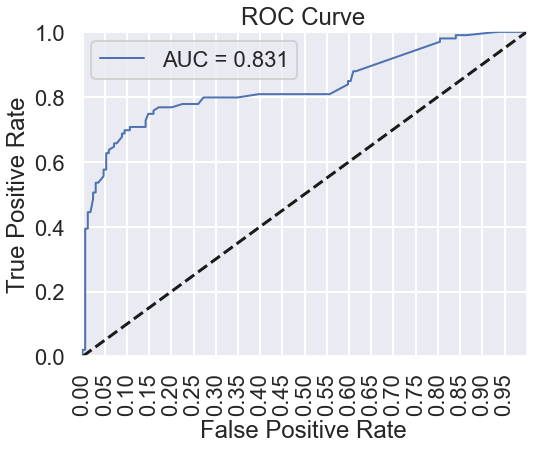

In [52]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

## Model Complexity

In [53]:
from sklearn.preprocessing import PolynomialFeatures
acc_train=[]
acc_test=[]

for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly= poly_reg.fit_transform(xtrain)
    X_tst_poly = poly_reg.fit_transform(xtest)
    
    lr_poly = LogisticRegression(random_state=25)
    lr_poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted = lr_poly.predict(X_tr_poly)
    y_tst_predict = lr_poly.predict(X_tst_poly)
    acc_train.append(accuracy_score(ytrain, y_tr_predicted))
    acc_test.append(accuracy_score(ytest, y_tst_predict))
    

C:\Users\Yasir\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yasir\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yasir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

<AxesSubplot:>

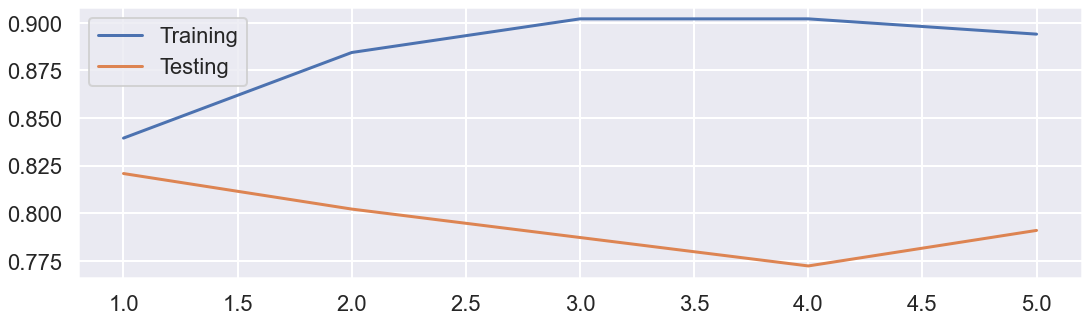

In [54]:
plt.figure(figsize=(18,5))
sns.set_context('poster')

sns.lineplot(x=list(range(1,6)), y=acc_train, label='Training')

sns.lineplot(x=list(range(1,6)), y=acc_test, label='Testing')

# 3. Submission on Kaggle

### Task 4: Import test data

In [95]:
#write code here
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()

### Task 5: Do One Hot encoding of test data

In [96]:
#write code here
df_test_OneHot=pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_test = df_test_OneHot.copy()

In [97]:
df_test.shape

(418, 31)

### Task 6: Separate Passenger ID for submission

In [98]:
#Write code here
PassengerID = df_test['PassengerId']
#df_test.drop(['Survived'], axis=1 , inplace=True)
df_test.drop(['PassengerId'], axis=1 , inplace=True)

In [99]:
df_test.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


### Task 7: Do prediction through final model

In [100]:
#write code here
pred_final=lr_model.predict(df_test)

C:\Users\Yasir\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- FareCat_10-25
Feature names seen at fit time, yet now missing:
- FareCat_Oct-25

  warnings.warn(message, FutureWarning)


#### Creating Data Frame for submission

In [101]:
submission =pd.DataFrame({'PassengerId': PassengerID ,'Survived':pred_final})

In [102]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Task 8: Export the dataset into csv file

In [103]:
# Write code here
submission.to_csv('my submission vl.0.cvs', index=False)